# Diabetes Health Insights: EDA of Pima Indians Dataset

### Import dependencies

In [97]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings

### Loading the data

In [98]:
diabetes = pd.read_csv(r"C:\Users\LIZZY\Downloads\diabetes.csv")
diabetes

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Metadata of data

In [99]:
# No of rows
print ("No of Rows:", diabetes.shape[0])

No of Rows: 768


In [100]:
# No of Columns
print ("No of Columns:", diabetes.shape[1])

No of Columns: 9


In [101]:
# Data types
diabetes.dtypes

Pregnancies                     int64
Glucose                         int64
Blood_Pressure                  int64
Skin_Thickness                  int64
Insulin                         int64
BMI                           float64
Diabetes_Pedigree_Function    float64
Age                             int64
Outcome                         int64
dtype: object

### Summary statistics

In [102]:
diabetes.describe()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data cleaning and manipulation

In [103]:
# Handling missing values
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64

In [104]:
# Columns where zero values represents missing data 
cols = ['Glucose','Blood_Pressure','Skin_Thickness','Insulin','BMI']

# Replace zeros with the median of each column
diabetes[cols] = diabetes[cols].replace(0, diabetes[cols].median())

diabetes.head(10)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


In [105]:
# Renaming values in a column
diabetes['Outcome'] = diabetes['Outcome'].replace({0: 'Not Diabetic', 1: 'Diabetic'})
diabetes

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,Diabetic
1,1,85,66,29,30.5,26.6,0.351,31,Not Diabetic
2,8,183,64,23,30.5,23.3,0.672,32,Diabetic
3,1,89,66,23,94.0,28.1,0.167,21,Not Diabetic
4,0,137,40,35,168.0,43.1,2.288,33,Diabetic
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,Not Diabetic
764,2,122,70,27,30.5,36.8,0.340,27,Not Diabetic
765,5,121,72,23,112.0,26.2,0.245,30,Not Diabetic
766,1,126,60,23,30.5,30.1,0.349,47,Diabetic


## Exploratory Data Analysis

### Question 1: How are the values of key markers (glucose, blood pressure, BMI, insulin) distributed?

In [106]:
# Columns to visualize
key_markers = ['Glucose', 'Blood_Pressure', 'BMI', 'Insulin']

# Loop through columns and create histogram for each
for col in key_markers:
    fig = px.histogram(diabetes, 
                       x=col, 
                       nbins=30, 
                       title=f'Distribution of {col}', 
                       marginal="box",         
        color_discrete_sequence=['teal'])
    fig.show()

### Question 2: How do these markers differ between diabetic and non-diabetic individuals? (Outcome)

In [107]:
# Columns to compare
key_markers = ['Glucose', 'Blood_Pressure', 'BMI', 'Insulin']

# Loop through each marker and plot separately
for col in key_markers:
    fig = px.histogram(diabetes,
                       x=col,
                       color='Outcome', 
                       barmode='overlay', 
                       nbins=30,
                       color_discrete_map={'Not Diabetic': 'lightblue',
                                          'Diabetic': 'teal'},
        title=f'{col} Distribution by Diabetes Outcome',
        marginal='box')
    fig.show()

### Question 3: Relationship between BMI & glucose levels between diabetic and non-diabetic individuals(outcomes)

In [108]:
fig = px.scatter(diabetes,x='BMI',
                 y='Glucose',
                 color='Outcome', 
                 color_discrete_map={'Not Diabetic': 'lightblue',
                                     'Diabetic': 'teal'},
    trendline='ols',                  
    trendline_scope='group',          
    title='Relationship Between BMI and Glucose by Diabetes Outcome',
    labels={'BMI':'BMI (kg/m²)', 'Glucose':'Glucose (mg/dL)'})

fig.show()

### Question 4: How does age affect glucose and BMI levels between diabetes outcomes

In [109]:
# Y-axes to plot against Age
y_markers = ['Glucose', 'BMI']

for y in y_markers:
    fig = px.scatter(
        diabetes,
        x='Age',
        y=y,
        color='Outcome',                  
        color_discrete_map={'Not Diabetic': 'lightblue',
                            'Diabetic': 'teal'},
        trendline='ols',
        trendline_scope='group',
        title=f'Age vs {y} by Diabetes Outcome',
        labels={'Age':'Age (years)', y:f'{y}'})
    fig.show()

### Question 5: Compare Glucose, BMI and Insulin distributions by number of pregnancies

In [110]:
# Columns to compare
markers = ['Glucose', 'BMI', 'Insulin']

for marker in markers:
    fig = px.box(
        diabetes,
        x='Pregnancies',
        y=marker,
        color='Outcome',                     
        color_discrete_map={'Not Diabetic': 'lightblue',
                            'Diabetic': 'teal'},
        title=f'{marker} Distribution by Number of Pregnancies and Diabetes Outcome',
        labels={'Pregnancies':'Number of Pregnancies', marker:marker})
    fig.show()

#### Question 6: How does genetic risk (Diabetes Pedigree Function) relate to diabetes outcomes?

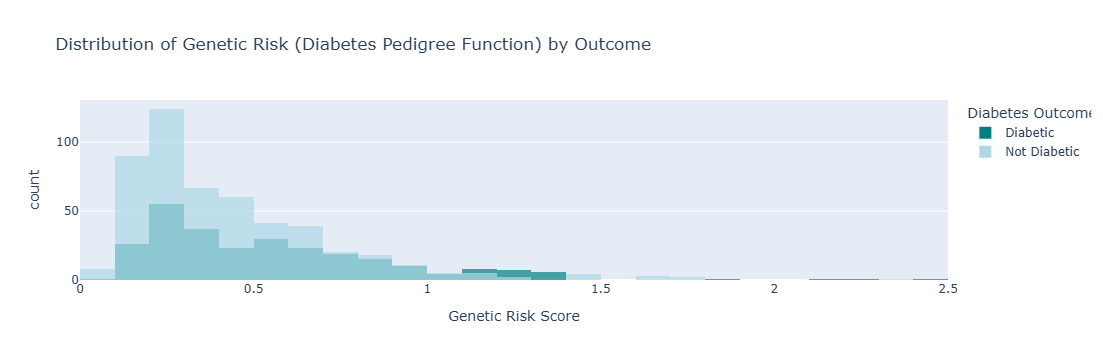

In [111]:
fig = px.histogram(
    diabetes,
    x='Diabetes_Pedigree_Function',
    color='Outcome',                     
    barmode='overlay',                   
    nbins=30,                            
    color_discrete_map={'Not Diabetic': 'lightblue',
                        'Diabetic': 'teal'},
    title='Distribution of Genetic Risk (Diabetes Pedigree Function) by Outcome',
    labels={'Diabetes_Pedigree_Function':'Genetic Risk Score',
            'Outcome':'Diabetes Outcome'},
    opacity=0.7)

fig.show()

### Question 7: Correlation between the different health markers. Are some linked?

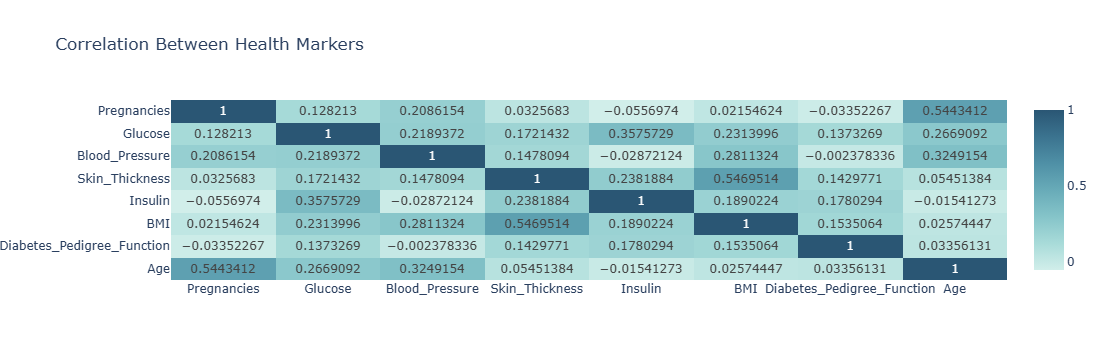

In [112]:
# Select numeric columns to check correlation
numeric_cols = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']

# Compute correlation matrix
corr_matrix = diabetes[numeric_cols].corr()

# Plot heatmap
fig = px.imshow(
    corr_matrix,
    text_auto=True,               
    aspect="auto",
    color_continuous_scale='Teal', 
    title='Correlation Between Health Markers')

fig.show()